<a href="https://colab.research.google.com/github/sridhartroy/AIML/blob/main/LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Read a publicly available text file from a URL.

import urllib.request

url = ("https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt")
file_path = ("the-verdict.txt")

urllib.request.urlretrieve(url, file_path)

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

print("Length of the file is : ", len(text))

print(text[:99])


Length of the file is :  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [8]:
#Split the text that was just read using reg expressions and print the length of the text before and after split

import re

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed), len(text))

print(preprocessed[:30])


4690 20479
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [9]:
# In this step , we need to sort the tokenized text, remove dups, and assign an unique integer for each token.

all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size, type(all_words))

vocab = {token:integer for integer,token in enumerate(all_words)}

for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break


1130 <class 'list'>
('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [10]:
# Tokenizer Class that takes in the vocab that we created. And also, we send a sample new text for tokenization and encoding to an unique integer id and then decode as well.
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab # vocab is a dictionary and hence str_to_int is a dictionary as well
        self.int_to_str = {i:s for s,i in vocab.items()}
       # print(self.str_to_int)

    def encode(self, text): #new input text
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed] # creating a list
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [11]:
# use the above class by instantiating it with the vocabulary we created earlier from the verdict corpus. And then encode and decode

tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(len(ids), ids)

print(tokenizer.decode(ids))

text1 = """"Mrs. said pride."""
ids1 = tokenizer.encode(text1)
print(len(ids1), ids1)

print(tokenizer.decode(ids1))

21 [1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.
6 [1, 67, 7, 851, 793, 7]
" Mrs. said pride.


In [12]:
# what about words or tokens not in the corupus like below?

text2 = """"Mr. Sridhar said pride."""
ids2 = tokenizer.encode(text2)
print(len(ids2), ids2)

print(tokenizer.decode(ids2))

KeyError: 'Sridhar'

In [13]:
# Need to add some additional tokens for a. unknown b. end of source text

all_tokens = sorted(set(preprocessed))
print(len(all_tokens))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
print(len(all_tokens))

vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab))

for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

1130
1132
1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [14]:
# Now need to modify the tokenizer custom class to include above

class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab # vocab is a dictionary and hence str_to_int is a dictionary as well
        self.int_to_str = {i:s for s,i in vocab.items()}
       # print(self.str_to_int)

    def encode(self, text): #new input text
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        print("Preprocessed before token check : " , preprocessed)
        # now check for each token in the preprocessed against the vocab.
        preprocessed = [item if item in self.str_to_int
                             else "<|unk|>"
                        for item in preprocessed]

        ids = [self.str_to_int[s] for s in preprocessed] # creating a list
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [15]:
# Let's test the new tokenizer class

# with existing valid text matching tokens in the vocab

tokenizer = SimpleTokenizerV2(vocab)
text = """"It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(len(ids), ids)

text = tokenizer.decode(ids)
print(text)

# 2 unrelated texts mixed with unknown tokens

text1 = "the last he painted, Sridhar"
text2 = "Hello, do you like tea?"
text = " <|endoftext|> ".join((text1, text2))

print(text)
ids = tokenizer.encode(text)
print(len(ids), ids)

text = tokenizer.decode(ids)
print(text)

Preprocessed before token check :  ['"', 'It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', '"', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '.']
21 [1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.
the last he painted, Sridhar <|endoftext|> Hello, do you like tea?
Preprocessed before token check :  ['the', 'last', 'he', 'painted', ',', 'Sridhar', '<|endoftext|>', 'Hello', ',', 'do', 'you', 'like', 'tea', '?']
14 [988, 602, 533, 746, 5, 1131, 1130, 1131, 5, 355, 1126, 628, 975, 10]
the last he painted, <|unk|> <|endoftext|> <|unk|>, do you like tea?


In [16]:
# using Byte Pair Encoding algorithm for Tokenization
!pip install tiktoken

from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
tiktoken version: 0.8.0


In [17]:
tokenizer = tiktoken.get_encoding("gpt2")


text1 = "the last he painted, Sridhar"
text2 = "Hello, do you like tea?"
text = " <|endoftext|> ".join((text1, text2))

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[1169, 938, 339, 13055, 11, 311, 6058, 9869, 220, 50256, 18435, 11, 466, 345, 588, 8887, 30]
the last he painted, Sridhar <|endoftext|> Hello, do you like tea?


In [18]:
from typing import TextIO
# Exercise 2.1 Byte pair encoding of unknown words
"""
Try the BPE tokenizer from the tiktoken library on the unknown words “Akwirw ier” and print the individual token IDs. Then, call the decode function on each of the resulting integers in this list to reproduce the mapping shown in figure 2.11. Lastly, call the decode method on the token IDs to check whether it can reconstruct the original input, “Akwirw ier.”
"""
tokenizerR50 = tiktoken.get_encoding("r50k_base")
tokenizerP50 = tiktoken.get_encoding("p50k_base")
tokenizerCl100k = tiktoken.get_encoding("cl100k_base")
tokenizero200k = tiktoken.get_encoding("o200k_base")

text = "Akwirw ier"

integers = tokenizerR50.encode(text, allowed_special={"<|endoftext|>"})
print("R50 ", integers, type(integers))

for i in integers:
    print(tokenizerR50.decode([i]), "-->", i)


print("---------------------------------")

print(tokenizerR50.decode(integers))


integers = tokenizerP50.encode(text, allowed_special={"<|endoftext|>"})
print("P50 ", integers, type(integers))

for i in integers:
    print(tokenizerP50.decode([i]), "-->", i)


print("---------------------------------")

print(tokenizerP50.decode(integers))

integers = tokenizerCl100k.encode(text, allowed_special={"<|endoftext|>"})
print("cl100k ", integers, type(integers))

for i in integers:
    print(tokenizerCl100k.decode([i]), "-->", i)


print("---------------------------------")

print(tokenizerCl100k.decode(integers))


integers = tokenizero200k.encode(text, allowed_special={"<|endoftext|>"})
print("o200k ", integers, type(integers))

for i in integers:
    print(tokenizero200k.decode([i]), "-->", i)


print("---------------------------------")

print(tokenizero200k.decode(integers))


R50  [33901, 86, 343, 86, 220, 959] <class 'list'>
Ak --> 33901
w --> 86
ir --> 343
w --> 86
  --> 220
ier --> 959
---------------------------------
Akwirw ier
P50  [33901, 86, 343, 86, 220, 959] <class 'list'>
Ak --> 33901
w --> 86
ir --> 343
w --> 86
  --> 220
ier --> 959
---------------------------------
Akwirw ier
cl100k  [32, 29700, 404, 86, 602, 261] <class 'list'>
A --> 32
kw --> 29700
ir --> 404
w --> 86
 i --> 602
er --> 261
---------------------------------
Akwirw ier
o200k  [32, 9500, 380, 86, 131455] <class 'list'>
A --> 32
kw --> 9500
ir --> 380
w --> 86
 ier --> 131455
---------------------------------
Akwirw ier


In [19]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# print(raw_text)
enc_text = tokenizer.encode(raw_text)
print(len(enc_text), type(enc_text))

# do a sampling for 50 tokens

enc_sample = enc_text[50:]
#print(enc_sample)
#print(tokenizer.decode(enc_sample))

context_size = 10
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")

for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

5145 <class 'list'>
x: [290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686]
y:      [4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976]
[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257
[290, 4920, 2241, 287, 257] ----> 4489
[290, 4920, 2241, 287, 257, 4489] ----> 64
[290, 4920, 2241, 287, 257, 4489, 64] ----> 319
[290, 4920, 2241, 287, 257, 4489, 64, 319] ----> 262
[290, 4920, 2241, 287, 257, 4489, 64, 319, 262] ----> 34686
[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686] ----> 41976
 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a
 and established himself in a ---->  vill
 and established himself in a vill ----> a
 and established himself in a villa ---->  on
 and established himself in a villa on ---->  the
 and established himself in a villa on the ---->  Riv
 and established himself in a villa on the Riv ----> iera


In [20]:
import torch
from torch.utils.data import Dataset, DataLoader

In [21]:
#pip install torch==2.4.0

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/797.3 MB 14.9 MB/s eta 0:00:46ERROR: Operation cancelled by user
   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/797.3 MB 14.9 MB/s eta 0:00:46


In [22]:
import torch
torch.__version__
#torch.cuda.is_available()

'2.5.1+cu121'

In [23]:
import torch

tensor0d = torch.tensor(1)

tensor1d = torch.tensor([1.1, 2, 3])

tensor2d = torch.tensor([[1, 2,3],
                         [3, 4,5]])

tensor3d = torch.tensor([[[1, 2], [3, 4]],
                         [[5, 6], [7, 8]]])


print(tensor0d)
print(tensor1d)
print(tensor2d)
print(tensor3d)

print(tensor1d.dtype)

tensor0d = torch.tensor([1, 2, 3])
print(tensor0d.dtype)

tensor0df = tensor0d.to(torch.float32)
print(tensor0df.dtype)
print(tensor0d)
print(tensor0df)

tensor(1)
tensor([1.1000, 2.0000, 3.0000])
tensor([[1, 2, 3],
        [3, 4, 5]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.float32
torch.int64
torch.float32
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [24]:
print(tensor0d, tensor0d.shape)
print(tensor1d, tensor1d.shape)
print(tensor2d, tensor2d.shape)
print(tensor3d, tensor3d.shape)

print(tensor2d.reshape(3, 2))

print(tensor2d.view(3, 2))


print(tensor2d.T)

tensor([1, 2, 3]) torch.Size([3])
tensor([1.1000, 2.0000, 3.0000]) torch.Size([3])
tensor([[1, 2, 3],
        [3, 4, 5]]) torch.Size([2, 3])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]) torch.Size([2, 2, 2])
tensor([[1, 2],
        [3, 3],
        [4, 5]])
tensor([[1, 2],
        [3, 3],
        [4, 5]])
tensor([[1, 3],
        [2, 4],
        [3, 5]])


In [25]:
print(tensor2d)
print("**")
print(tensor2d.T)
print("MatMul")
print(tensor2d.matmul(tensor2d.T))
print(tensor2d @ tensor2d.T)

tensor([[1, 2, 3],
        [3, 4, 5]])
**
tensor([[1, 3],
        [2, 4],
        [3, 5]])
MatMul
tensor([[14, 26],
        [26, 50]])
tensor([[14, 26],
        [26, 50]])


In [26]:
# Seeing models as computational graphs.
#  A logistic regression forward pass.

import torch.nn.functional as F

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b = torch.tensor([0.0])
z = x1 * w1 + b
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a, y)

In [27]:
# computing the gradients via autograd function of torch

import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

print('******************************')

loss.backward()
print(w1.grad)
print(b.grad)

(tensor([-0.0898]),)
(tensor([-0.0817]),)
******************************
tensor([-0.0898])
tensor([-0.0817])


In [28]:
# Implement a multi-layer perceptron with 2 hidden layers
import torch.nn as M

class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [29]:
# instantiate the above neural network

model = NeuralNetwork(50, 3)

print(model)

# No. of trainable parameters of this model.

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

total_params = sum(p.numel() for p in model.parameters())
print("Total number of model parameters:", total_params)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)
Total number of trainable model parameters: 2213
Total number of model parameters: 2213


In [30]:
# Now let's print out the weight tensor

print("Weight Matrix")
print(model.layers[0].weight, model.layers[0].weight.shape, type(model.layers), type(model.layers[0]), (model.layers[0].weight.dtype))

print("Bias Vector")
print(model.layers[0].bias, model.layers[0].bias.shape, type(model.layers), type(model.layers[0]), (model.layers[0].bias.dtype))

Weight Matrix
Parameter containing:
tensor([[ 0.1404, -0.0391,  0.1219,  ..., -0.1195,  0.0136, -0.1377],
        [-0.0734,  0.1110,  0.1215,  ...,  0.1370,  0.0806, -0.1129],
        [-0.1231, -0.0246, -0.1290,  ..., -0.1213, -0.0708,  0.1316],
        ...,
        [ 0.0808,  0.0860,  0.1184,  ...,  0.0141,  0.0147, -0.0864],
        [-0.0207, -0.0074,  0.1343,  ...,  0.1321, -0.1388,  0.0354],
        [ 0.0154, -0.0794, -0.0605,  ..., -0.1230, -0.1142,  0.1391]],
       requires_grad=True) torch.Size([30, 50]) <class 'torch.nn.modules.container.Sequential'> <class 'torch.nn.modules.linear.Linear'> torch.float32
Bias Vector
Parameter containing:
tensor([-0.0030,  0.0367, -0.0860, -0.0418, -0.0937,  0.1371,  0.1177,  0.0706,
         0.0342, -0.0824,  0.1251,  0.0767,  0.0276, -0.0164,  0.0909,  0.0118,
        -0.0506,  0.1109, -0.0391, -0.1404,  0.1047, -0.1009,  0.0106, -0.0979,
         0.0295, -0.0504, -0.1323,  0.0943,  0.1179, -0.0085],
       requires_grad=True) torch.Size([30]

In [31]:
torch.manual_seed(123)
model = NeuralNetwork(50, 3)
print(model)
print(model.layers[0].weight.shape, model.layers[0].bias.shape)
print(model.layers[2].weight.shape, model.layers[2].bias.shape)
print(model.layers[4].weight.shape, model.layers[4].bias.shape)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)
torch.Size([30, 50]) torch.Size([30])
torch.Size([20, 30]) torch.Size([20])
torch.Size([3, 20]) torch.Size([3])


In [32]:
torch.manual_seed(123)
X = torch.rand((1, 50))
print(X)
out = torch.softmax(model(X), dim=1)
out1 = model(X)
print(out)
print(out1)

print(model.layers[0].weight.shape, model.layers[0].bias.shape)
print(model.layers[2].weight.shape, model.layers[2].bias.shape)
print(model.layers[4].weight.shape, model.layers[4].bias.shape)


tensor([[0.2961, 0.5166, 0.2517, 0.6886, 0.0740, 0.8665, 0.1366, 0.1025, 0.1841,
         0.7264, 0.3153, 0.6871, 0.0756, 0.1966, 0.3164, 0.4017, 0.1186, 0.8274,
         0.3821, 0.6605, 0.8536, 0.5932, 0.6367, 0.9826, 0.2745, 0.6584, 0.2775,
         0.8573, 0.8993, 0.0390, 0.9268, 0.7388, 0.7179, 0.7058, 0.9156, 0.4340,
         0.0772, 0.3565, 0.1479, 0.5331, 0.4066, 0.2318, 0.4545, 0.9737, 0.4606,
         0.5159, 0.4220, 0.5786, 0.9455, 0.8057]])
tensor([[0.3113, 0.3934, 0.2952]], grad_fn=<SoftmaxBackward0>)
tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)
torch.Size([30, 50]) torch.Size([30])
torch.Size([20, 30]) torch.Size([20])
torch.Size([3, 20]) torch.Size([3])


In [33]:
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [34]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


In [35]:
# Setting up efficient data loaders and data sets

X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])
y_test = torch.tensor([0, 1])


In [36]:
from torch.utils.data import Dataset

class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y
        print(type(self.features), type(self.labels))

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)


print(X_train, X_train.shape)
print(y_train, y_train.shape)
print(train_ds.features, train_ds.labels, train_ds.__len__())

<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([[-1.2000,  3.1000],
        [-0.9000,  2.9000],
        [-0.5000,  2.6000],
        [ 2.3000, -1.1000],
        [ 2.7000, -1.5000]]) torch.Size([5, 2])
tensor([0, 0, 0, 1, 1]) torch.Size([5])
tensor([[-1.2000,  3.1000],
        [-0.9000,  2.9000],
        [-0.5000,  2.6000],
        [ 2.3000, -1.1000],
        [ 2.7000, -1.5000]]) tensor([0, 0, 0, 1, 1]) 5


In [37]:
from torch.utils.data import DataLoader


torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

print(train_ds.features, train_ds.labels)
print("**************************************")

en=enumerate(train_loader)
print(en)
print("**************************************")
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

tensor([[-1.2000,  3.1000],
        [-0.9000,  2.9000],
        [-0.5000,  2.6000],
        [ 2.3000, -1.1000],
        [ 2.7000, -1.5000]]) tensor([0, 0, 0, 1, 1])
**************************************
**************************************
Batch 1: tensor([[ 2.7000, -1.5000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[ 2.3000, -1.1000],
        [-1.2000,  3.1000]]) tensor([1, 0])
Batch 3: tensor([[-0.5000,  2.6000]]) tensor([0])


In [38]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[-0.5000,  2.6000],
        [-0.9000,  2.9000]]) tensor([0, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [ 2.3000, -1.1000]]) tensor([0, 1])


In [39]:
# Now that we have a dataset and dataloader defined. Let's try to use these to train the sample model that we had instantiated few cells above.

import torch.nn.functional as F

torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(
    model.parameters(), lr=0.5
)

num_epochs = 3
for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train Loss: {loss:.2f}")

    model.eval()
    # Insert optional model evaluation code

Epoch: 001/003 | Batch 000/002 | Train Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train Loss: 0.00


In [40]:

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 752


In [41]:
# above model is trained with x_train and y_train
# now do a test with the entire training set. typically we use a validation dataset and then a test dataset
model.eval()
with torch.no_grad():
    outputs = model(X_train)
print(outputs)


# apply softmax to get probabilities

torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

# convert to 0s and 1s using argmax

predictions = torch.argmax(probas, dim=1)
print(predictions)

predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])
tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])
tensor([0, 0, 0, 1, 1])
tensor([0, 0, 0, 1, 1])


In [42]:
# evaluation

predictions == y_train

# no. of correct predictions

torch.sum(predictions == y_train)

# function to compute the prediction accuracy

def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [43]:
# print the accuracy of prediction from above function for our sample model and dataset

#on training set
print("Training Accuracy : ", compute_accuracy(model, train_loader))

#on testing set
print("Test Accuracy : ", compute_accuracy(model, test_loader))

Training Accuracy :  1.0
Test Accuracy :  1.0


In [44]:
#  Continuing from cell 14...we need now to convert the token ids that the bpe tokernizer created to embeddings

# Instantiate Dataset

import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt) # use the tiktoken to tokenize the entire text
        print(len(token_ids))

        for i in range(0, len(token_ids) - max_length, stride): #chunking the token ids into overlapping sequences of max_lenght to create sliding window. And convert the list chunks to a tensor
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
           # print(self.input_ids[i], self.target_ids[i])
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [45]:
# following code uses the above dataset to load the inputs in batches via the dataloader

def create_dataloader_v1(txt, batch_size, max_length,
                         stride, shuffle, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2") #use openai tiktoken and use gpt2
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #create the dataset. this will have 2 lists of tensors
    #print(len(dataset.target_ids))
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [46]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()


dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)

print(first_batch)

#tokenizer.decode(first_batch[1])

second_batch = next(data_iter)
print(second_batch)



dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=2, stride=2, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)

print(first_batch)

second_batch = next(data_iter)
print(second_batch)



dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=8, stride=2, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)

print(first_batch)

second_batch = next(data_iter)
print(second_batch)

5145
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]
5145
[tensor([[ 40, 367]]), tensor([[ 367, 2885]])]
[tensor([[2885, 1464]]), tensor([[1464, 1807]])]
5145
[tensor([[  40,  367, 2885, 1464, 1807, 3619,  402,  271]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899]])]
[tensor([[ 2885,  1464,  1807,  3619,   402,   271, 10899,  2138]]), tensor([[ 1464,  1807,  3619,   402,   271, 10899,  2138,   257]])]


In [47]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

# NOTE : Note that we increase the stride to 4 to utilize the data set fully (we don’t skip a single word). This avoids any overlap between the batches since more overlap could lead to increased overfitting.

5145
Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [48]:
# Next converting token ids to token emeddings. Preparation involves tokenizing text, converting text tokens to token IDs, and converting token IDs into embedding vectors. Here, we consider the previously created token IDs to create the token embedding vectors.


input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6 # small corpus
output_dim = 3 # small dimension for each embedding / token
# Note. BPE has vocab of 50,257. And each embedding vector has dim of 12,288

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(input_ids)
print("*****************************************************************")
print(embedding_layer.weight)
print("*****************************************************************")
# There is one row for each of the six possible tokens in the vocabulary, and there is one column for each of the three embedding dimensions.


#let’s apply it to a token ID to obtain the embedding vector:

print(embedding_layer(torch.tensor([3])))
print("*****************************************************************")
# In other words, the embedding layer is essentially a lookup operation that retrieves rows from the embedding layer’s weight matrix via a token ID.

print(embedding_layer(input_ids))
print("*****************************************************************")

tensor([2, 3, 5, 1])
*****************************************************************
Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
*****************************************************************
tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)
*****************************************************************
tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)
*****************************************************************


In [49]:
# Having now created embedding vectors from token IDs, next we’ll add a small modification to these embedding vectors to encode positional information about a token within a text.

# let's extend the dimensions to 128 and also use the vocab of the tokenizer bpe

vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)


max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
   stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

print("Targets IDs:\n", targets)
print("\nTargets shape:\n", targets.shape)


#As we can see, the token ID tensor is 8 × 4 dimensional, meaning that the data batch consists of eight text samples with four tokens each.



#Let’s now use the embedding layer to embed these token IDs into 256-dimensional vectors:
token_embeddings = token_embedding_layer(inputs)
print("\n Embeddings shape : \n", token_embeddings.shape)

# The embedding shape 8x4x256 means each token id is now converted to a 256 dim vector

# now we need to add absolute (instead of relative) position embedding. It should be of size 4x256

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print("\n Positional Embeddings shape : \n", pos_embeddings.shape)

print(pos_embeddings)

5145
Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])
Targets IDs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])

Targets shape:
 torch.Size([8, 4])

 Embeddings shape : 
 torch.Size([8, 4, 256])

 Positional Embeddings shape : 
 torch.Size([4, 256])
tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
        [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
        [-0.4651, -0.7757,  0.5806,  ...,  1.4

In [50]:
#he positional embedding tensor consists of four 256-dimensional vectors. We can now add these directly to the token embeddings, where PyTorch will add the 4 × 256–dimensional pos_embeddings tensor to each 4 × 256–dimensional token embedding tensor in each of the eight batches:

input_embeddings = token_embeddings + pos_embeddings
print("\n Input Embedding : \n", input_embeddings.shape)


 Input Embedding : 
 torch.Size([8, 4, 256])


In [51]:
# Coding Attention Mechanism

# Simplified self-attention without trainable weights

import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

# intermediary attention score vector w that takes the query vector x^2 and dot product with other input elements.

query = inputs[1]
print(inputs, inputs.shape)

attn_scores_2 = torch.empty(inputs.shape[0])

print("\n Instantiate Attention Score vector :\n", attn_scores_2, attn_scores_2.shape)

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print("\n Attention scores : \n", attn_scores_2)

#print(torch.dot(torch.tensor([0.4, 0.1, 0.8]), torch.tensor([0.5, 0.8, 0.6])))

#Normalize

attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("\nAttention weights: \n", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

#use softmax

def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("\nAttention weights with softmax naive: \n", attn_weights_2_naive)
print("\nSum: \n", attn_weights_2_naive.sum())


#pytorch softmax - normalize

attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("\nAttention weights with PyTorch Softmax: \n", attn_weights_2)
print("\nSum: \n", attn_weights_2.sum())

#create context vector

query = inputs[1]
print(query.shape)
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print("\n Context vector for x2 is : \n" , context_vec_2)

#context vectors for all input tokens

attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print("\n Attention score tensor :\n", attn_scores, type(attn_scores))



tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]]) torch.Size([6, 3])

 Instantiate Attention Score vector :
 tensor([    0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000]) torch.Size([6])

 Attention scores : 
 tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

Attention weights: 
 tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)

Attention weights with softmax naive: 
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

Sum: 
 tensor(1.)

Attention weights with PyTorch Softmax: 
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

Sum: 
 tensor(1.)
torch.Size([3])

 Context vector for x2 is : 
 tensor([0.4419, 0.6515, 0.5683])

 Attention score tensor :
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],


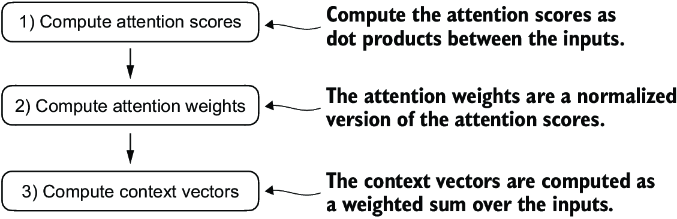

In [54]:
# from above cell we computed 6x6 attention score tensor for input tensor that has 6 tokens with each having 3 dim embedding.

# instead of above 2 fors, we can use @

attn_scores = inputs @ inputs.T
print("\nAttention score tensor :")
print(attn_scores, attn_scores.shape)

#normalize using softmax

attn_weights = torch.softmax(attn_scores, dim=1)
print("\nAttention weights tensor :")
print(attn_weights)

#Use attention weights to compute the context vectors

all_context_vecs = attn_weights @ inputs
print("\n All Context Vecotr:: \n",  all_context_vecs)

print("Previous 2nd context vector:", context_vec_2)


Attention score tensor :
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]]) torch.Size([6, 6])

Attention weights tensor :
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

 All Context Vecotr:: 
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [80]:
# Implementing self-attention with trainable weights
# This self-attention mechanism is also called scaled dot-product attention.
# Note that in GPT-like models, the input and output dimensions are usually the same, but to better follow the computation, we’ll use different input (d_in=3) and output (d_out=2) dimensions here.

x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

print(d_in, d_out, x_2)

# Initialize weight matrices Wq, Wk, and Wv.
# we will set requires_grad as True when we train the model

torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

print("W_query Shape : ", W_query.shape)
print("W_key Shape: ", W_key.shape)
print("W_value shape: ", W_value.shape)
# compute the respective vectors

query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print("Query Vector Qv for 2nd token : ", query_2)
print("Key Vector Qv for 2nd token   : ", key_2)
print("Value Vector Qv for 2nd token : ", value_2)

# We can obtain all keys and values via matrix multiplication:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print("\n")
print("queries.shape:", queries.shape)
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

print("\n")

print("Query Vector for entire Input String : \n", queries)
print("Key Vector for entire Input String   : \n", keys)
print("Value Vector for entire Input String : \n", values)

# Now onto attention score.
# The new aspect here is that we are not directly computing the dot-product between the input elements but using the query and key obtained by transforming the inputs via the respective weight matrices.

keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)

print("\n")
print("Query vector of Input token 2 : ", query_2)
print("Key vector of Input token 2   : ", keys_2)
print("Attention score for Input token 2 : ", attn_score_22)

# generalize for all attention scores for Query 2 with other keys.

attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

# Attention Weight
#We compute the attention weights by scaling the attention scores and using the softmax function. However, now we scale the attention scores by dividing them by the square root of the embedding dimension of the keys (taking the square root is mathematically the same as exponentiating by 0.5):

print("\n")
d_k = keys.shape[-1]
d_q = queries.shape[-1]
d_v = values.shape[-1]
print("dimension of k vector : ", d_k)
print("dimension of q vector : ", d_q)
print("dimension of v vector : ", d_v)

attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print("Attention Weights for Query 2 in turn Token 2 :", attn_weights_2)

3 2 tensor([0.5500, 0.8700, 0.6600])
W_query Shape :  torch.Size([3, 2])
W_key Shape:  torch.Size([3, 2])
W_value shape:  torch.Size([3, 2])
Query Vector Qv for 2nd token :  tensor([0.4306, 1.4551])
Key Vector Qv for 2nd token   :  tensor([0.4433, 1.1419])
Value Vector Qv for 2nd token :  tensor([0.3951, 1.0037])


queries.shape: torch.Size([6, 2])
keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


Query Vector for entire Input String : 
 tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])
Key Vector for entire Input String   : 
 tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
Value Vector for entire Input String : 
 tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221,